In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
476,51,M,ASY,132,218,1,LVH,139,N,0.1,Up,0
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat,1
290,48,M,NAP,110,211,0,Normal,138,N,0.0,Up,0
158,44,M,ASY,130,290,0,Normal,100,Y,2.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

### Visulization

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='ChestPainType', ylabel='count'>

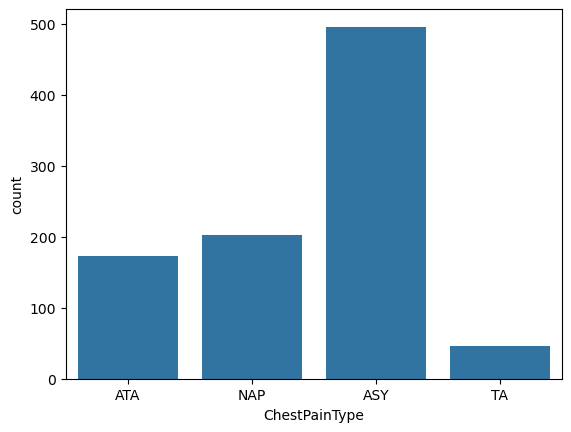

In [10]:
sns.countplot(x='ChestPainType', data=df)

<Axes: xlabel='ChestPainType', ylabel='RestingBP'>

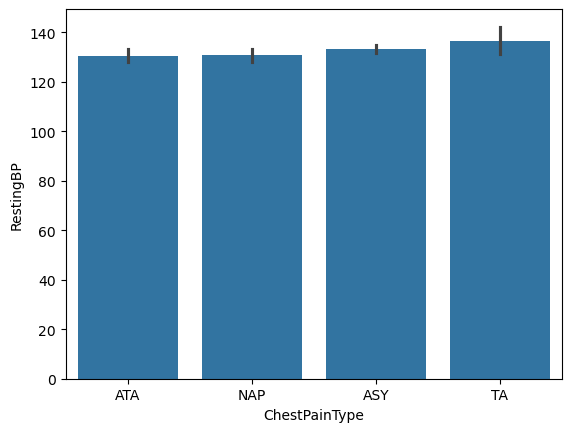

In [11]:
sns.barplot(x='ChestPainType', y='RestingBP', data=df)

C:\Users\mohammed junaid\AppData\Local\Temp\ipykernel_20208\1045987143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChestPainType', y='RestingBP', data=df, palette='viridis')


<Axes: xlabel='ChestPainType', ylabel='RestingBP'>

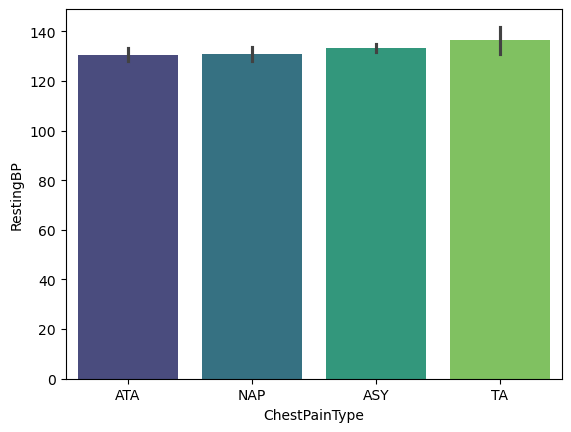

In [12]:
sns.barplot(x='ChestPainType', y='RestingBP', data=df, palette='viridis')

<Axes: xlabel='Cholesterol', ylabel='Count'>

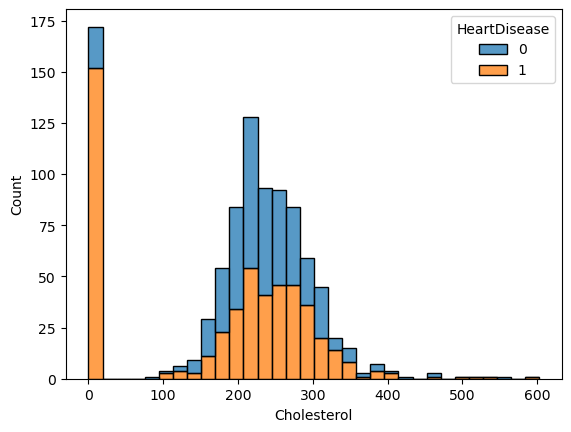

In [13]:
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease", multiple="stack")

<Axes: xlabel='MaxHR', ylabel='Density'>

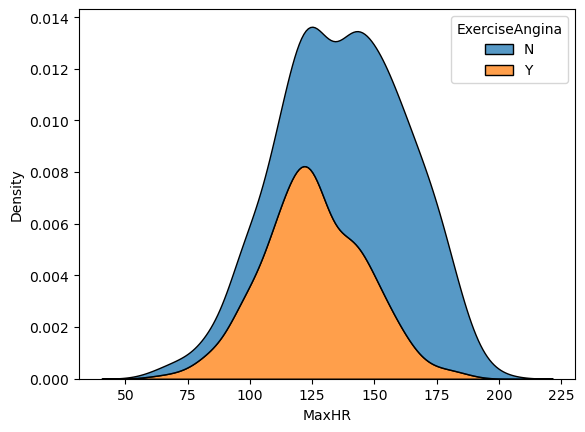

In [14]:
sns.kdeplot(data=df, x="MaxHR", hue="ExerciseAngina", multiple="stack")

<Axes: xlabel='MaxHR', ylabel='Density'>

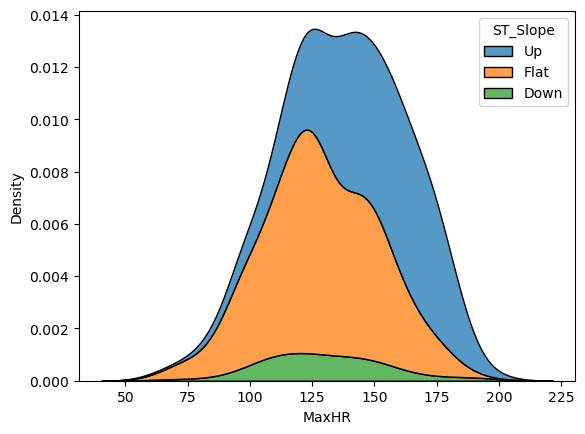

In [15]:
sns.kdeplot(data=df, x="MaxHR", hue="ST_Slope", multiple="stack")

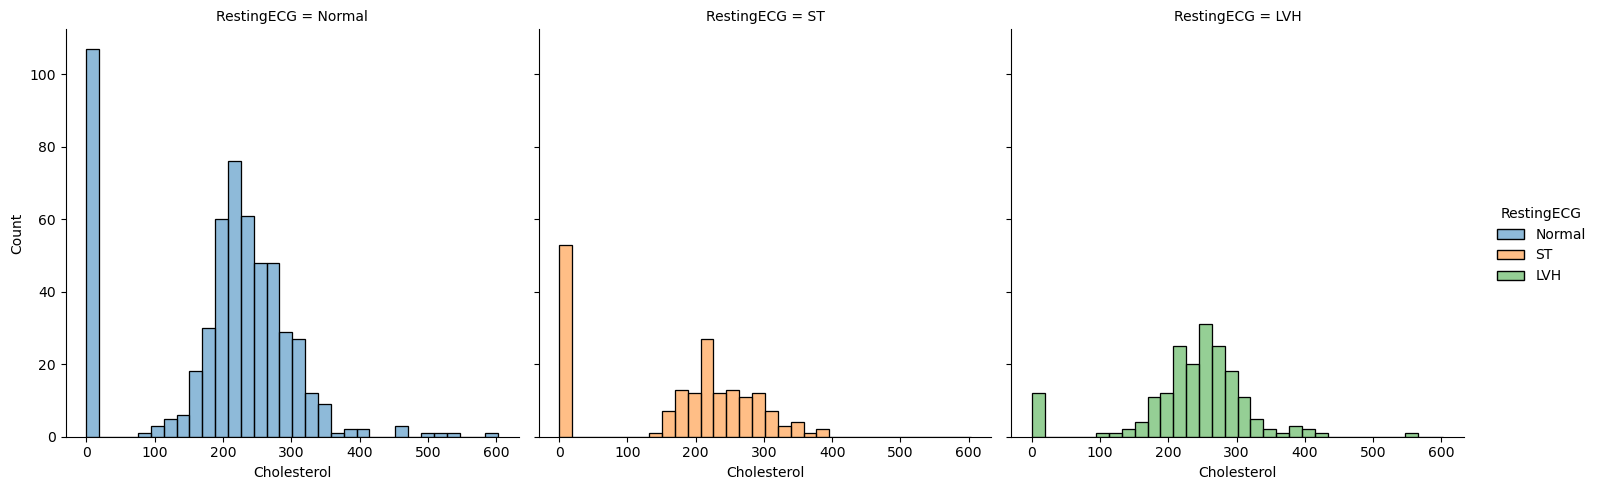

In [16]:
sns.displot(data=df, x="Cholesterol", hue="RestingECG", col="RestingECG")

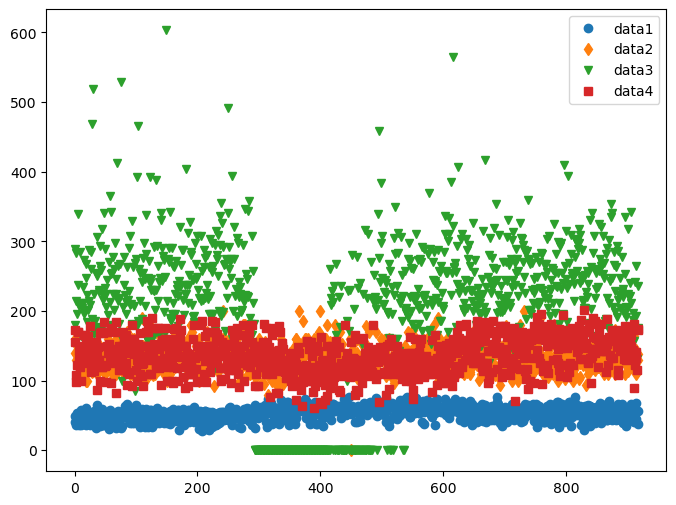

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df['Age'], 'o', label='data1')
ax.plot(df['RestingBP'], 'd', label='data2')
ax.plot(df['Cholesterol'], 'v', label='data3')
ax.plot(df['MaxHR'], 's', label='data4')
ax.legend()

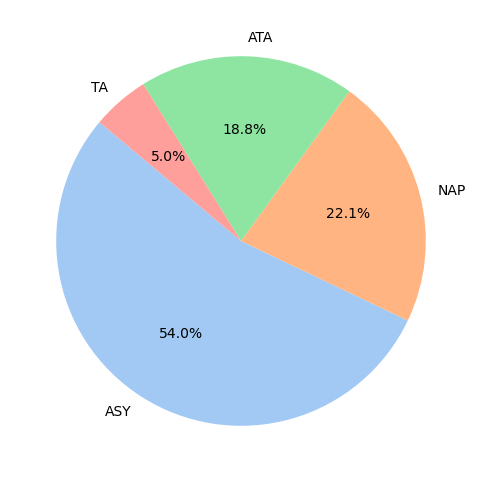

In [18]:
# Calculate count
segment_counts = df['ChestPainType'].value_counts() #works only on catogrical data
# Set Seaborn style and color palette
sns.set_palette("pastel")
# Plotting
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

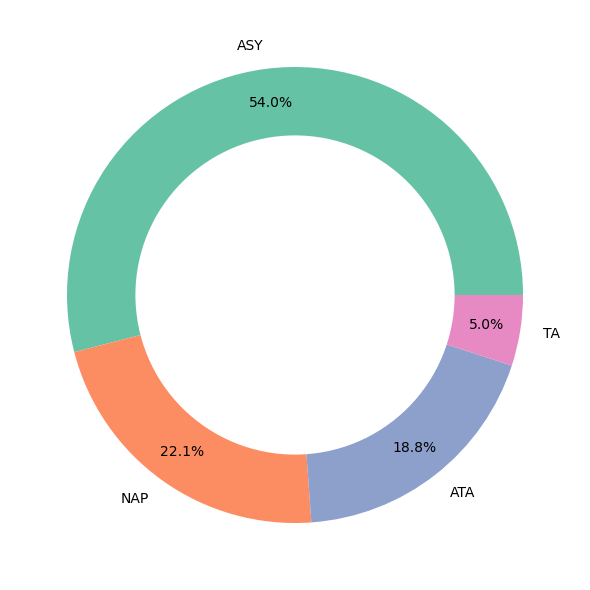

In [19]:
# Sample Data: Device Usage
"""usage = [40, 35, 20, 5]
labels = ['Mobile', 'Desktop', 'Tablet', 'Other']
"""
y = df['ChestPainType'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(y, labels=y.index, autopct='%1.1f%%', pctdistance=0.85, colors=sns.color_palette('Set2'))

# Draw a circle at the center to create the "donut" look
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

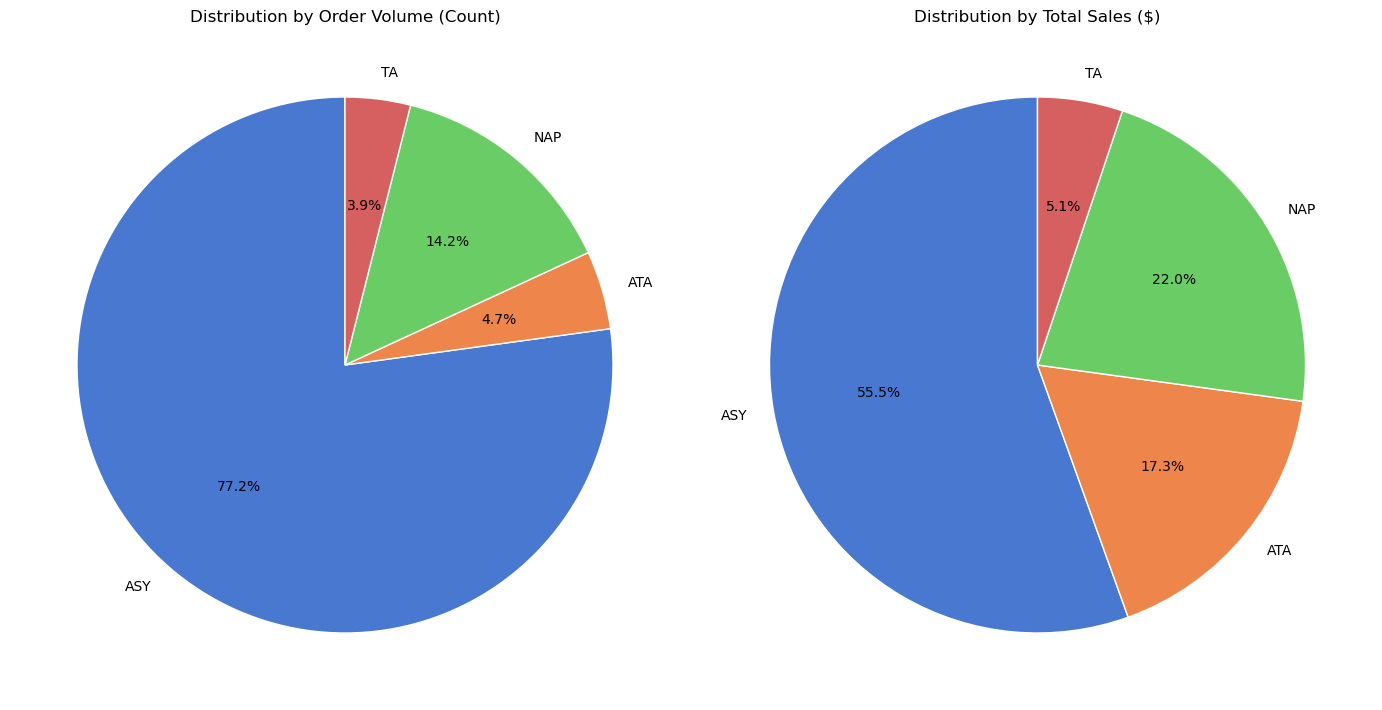

In [20]:
# Aggregate data for the two plots
order_counts = df.groupby('ChestPainType')['HeartDisease'].sum()
total_sales = df.groupby('ChestPainType')['Age'].sum()

# 2. Initialize the Subplot (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
colors = sns.color_palette("muted")

# 3. Plot 1: Frequency (Categorical Data)
ax1.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})
ax1.set_title('Distribution by Order Volume (Count)')

# 4. Plot 2: Value (Numerical Data)
ax2.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Distribution by Total Sales ($)')

plt.tight_layout()
plt.show()

In [21]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
339,64,F,ASY,95,0,1,Normal,145,N,1.1,Down,1
557,56,M,NAP,137,208,1,ST,122,Y,1.8,Flat,1
289,36,M,ATA,120,166,0,Normal,180,N,0.0,Up,0
798,42,F,ASY,102,265,0,LVH,122,N,0.6,Flat,0
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1


In [22]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [53]:
import seaborn.objects as so

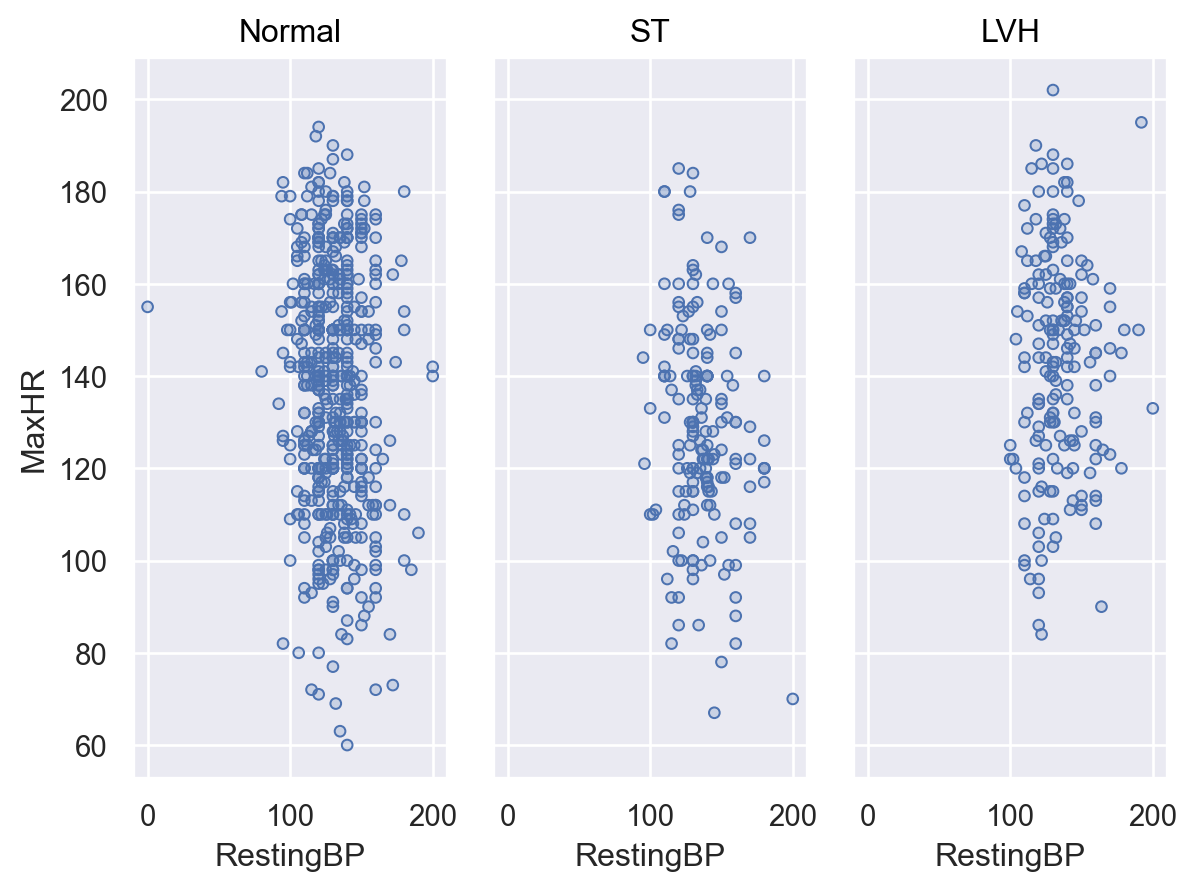

In [67]:
p = so.Plot(df, "RestingBP", "MaxHR").add(so.Dots())
p.facet("RestingECG")

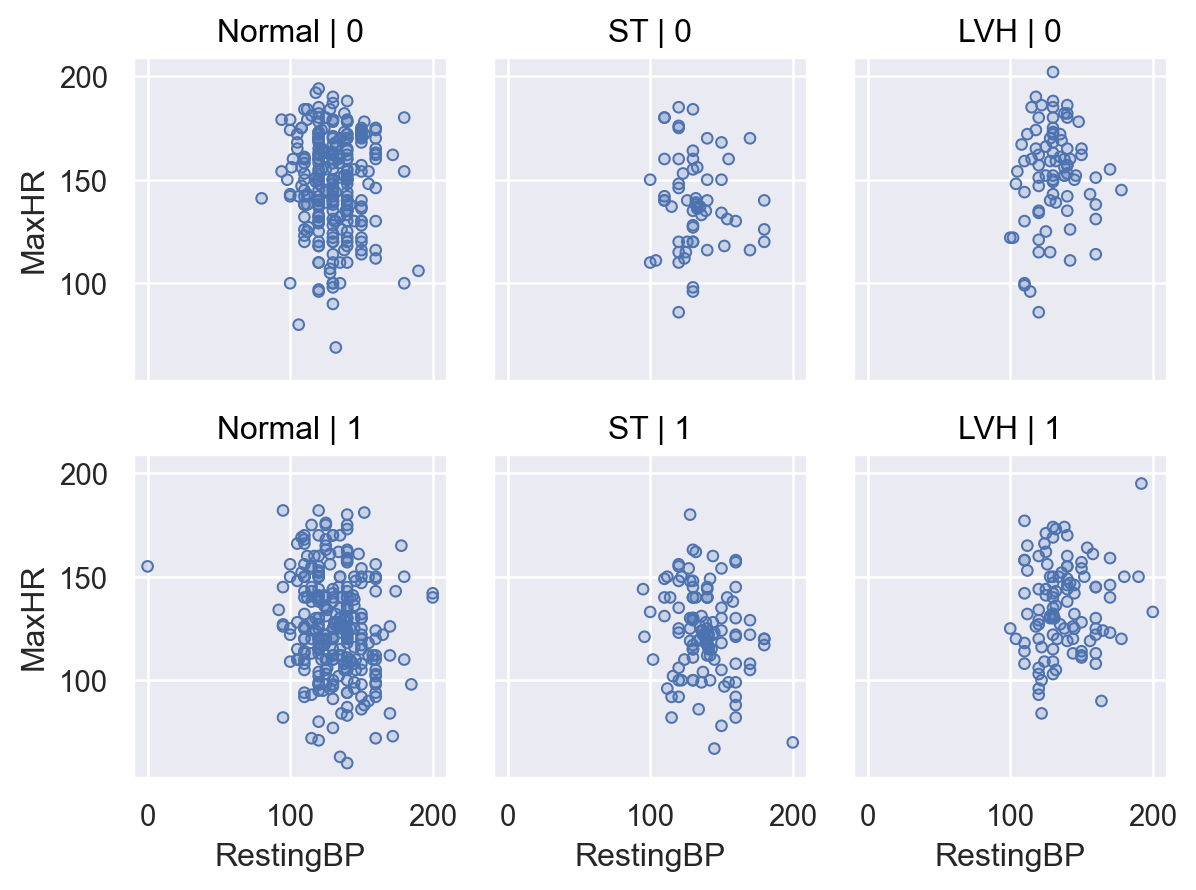

In [69]:
p.facet("RestingECG", "HeartDisease")

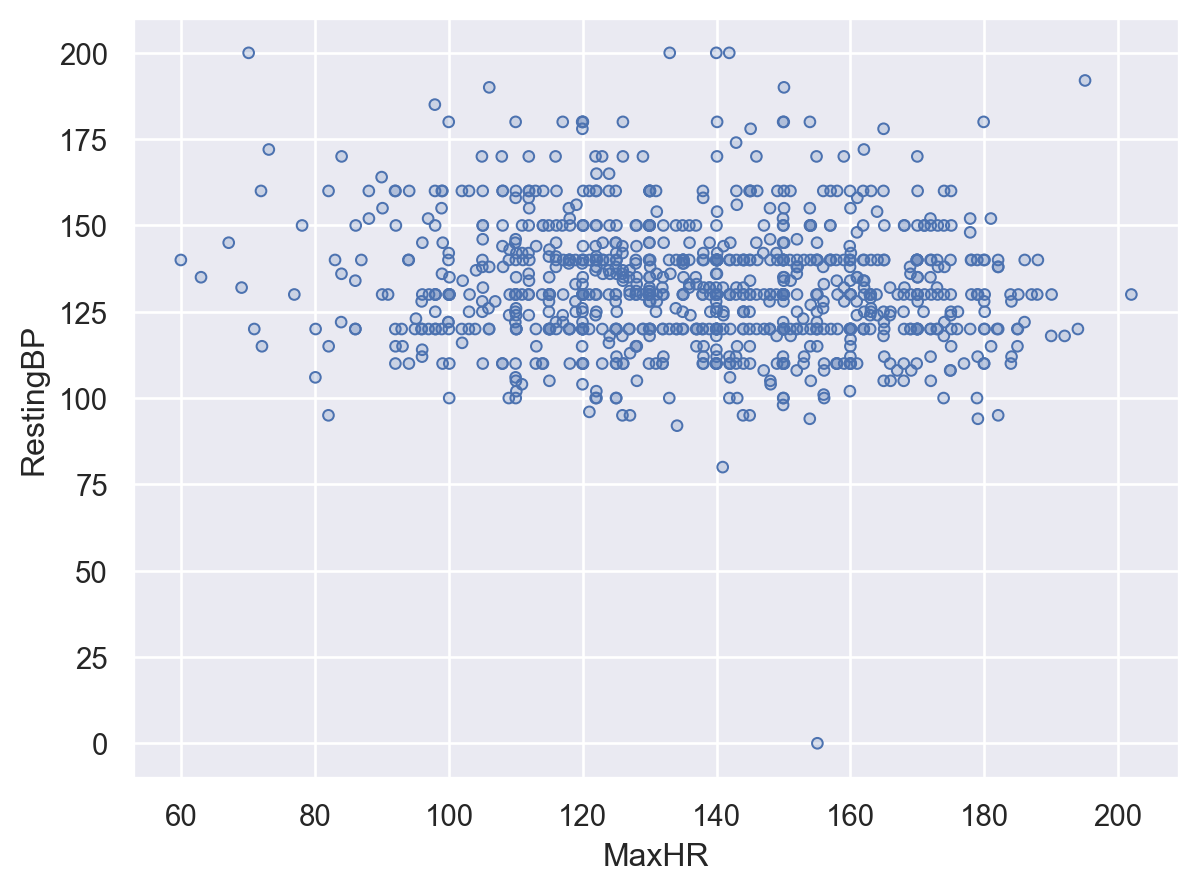

In [73]:
(
    so.Plot(df, "MaxHR", "RestingBP")
    .add(so.Dots(), so.Jitter(.25))
)